In [117]:
# Load pickled data
import pickle

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    
X_train_init, y_train_init = train['features'], train['labels']

In [118]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline


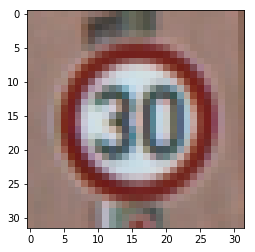

In [119]:
image = X_train_init[random.randint(0, len(X_train_init))]
plt.imshow(image)

In [143]:
def rotation(img, max_angle):
    # Rotation between 0 and max_angle degrees
    angle = random.randint(0, max_angle)
    
    rows, cols,ch = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    
    return(cv2.warpAffine(img,M,(cols,rows)))


def perspective(img):
    rows,cols,ch = img.shape
    pts1 = np.float32([[1,4],[20,6],[2,28],[24,28]])
    pts2 = np.float32([[0,0],[32,0],[0,32],[32,32]])
    
    M = cv2.getPerspectiveTransform(pts1,pts2)
    
    return(cv2.warpPerspective(img,M,(32,32)))  


def affine_transform(img):
    
    rows,cols,ch = img.shape
    
    rnd1 = random.randint(0, int(rows/5))
    rnd2 = random.randint(0, int(cols/5))
    
    pts1 = np.float32([[5,5],[20,9],[5,25]])
    pts2 = np.float32([[0,0],[15,32],[15,10]])
    M = cv2.getAffineTransform(pts1,pts2)
    return(cv2.warpAffine(img,M,(cols,rows)))


def random_transform(img, max_angle):
    
    # Rotation of the image
    result = rotation(image, max_angle)
    
    
    return result

In [144]:
image2 = random_transform(image, 120)

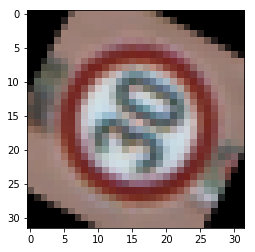

In [145]:
plt.imshow(image2)

In [146]:
image3 = perspective(image)

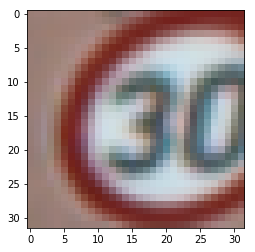

In [147]:
plt.imshow(image3)

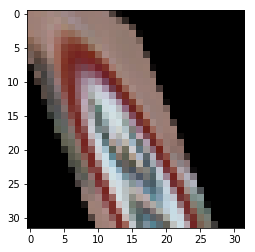

In [148]:
image4 = affine_transform(image)
plt.imshow(image4)

In [141]:
dataset = []

for i in range(10):
    dataset.append(random_transform(image))

TypeError: random_transform() missing 1 required positional argument: 'max_angle'